In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [204]:
data = pd.read_csv(
    '/home/alexander/Рабочий стол/uni_mlds/факлуьтатив/4lab/train.csv', na_values='?')


In [205]:
data.shape


(891, 12)

In [206]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
data.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [208]:
categorical_columns = [c for c in data.columns if data[c].dtype.name ==
                       'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name !=
                     'object']
print(categorical_columns)
print(numerical_columns)


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [209]:
data[categorical_columns].describe()


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [210]:
data[numerical_columns].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [211]:
data = data.fillna(data.median(axis=0), axis=0)

/tmp/ipykernel_2117/1820126261.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median(axis=0), axis=0)


In [212]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [213]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [215]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [216]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [217]:
data['Cabin'] = data['Cabin'].fillna('B96')

In [218]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


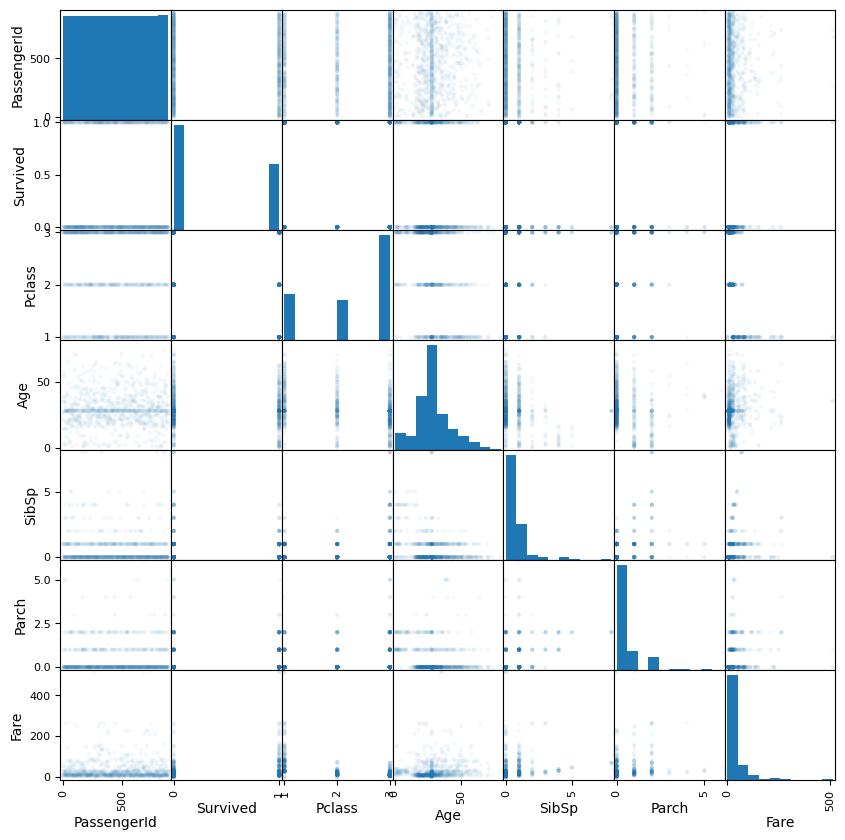

In [219]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [220]:
binary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Name', 'Ticket', 'Cabin', 'Embarked']


In [221]:
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1
data[binary_columns].describe()

,Sex
count,891
unique,2
top,0
freq,577


Male - 0
Female -1 

In [222]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       'Name_Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Name_Adahl, Mr. Mauritz Nils Martin', 'Name_Adams, Mr. John',
       'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Name_Aks, Mrs. Sam (Leah Rosen)', 'Name_Albimona, Mr. Nassef Cassem',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1723)


In [223]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,-1.794300e-17,-7.575933e-17,2.232906e-16,3.588600e-17,4.585433e-17,-1.196200e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729137e+00,-7.888293e-01,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-8.645684e-01,-7.888293e-01,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,0.000000e+00,-7.888293e-01,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.645684e-01,1.266279e+00,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,1.729137e+00,1.266279e+00,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00


In [224]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary),
axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(891, 1731)
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex', 'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1731)


In [225]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,-1.729137,-0.788829,0.826913,-0.565419,0.432550,-0.473408,-0.502163,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.725251,1.266279,-1.565228,0.663488,0.432550,-0.473408,0.786404,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.721365,1.266279,0.826913,-0.258192,-0.474279,-0.473408,-0.488580,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.717480,1.266279,-1.565228,0.433068,0.432550,-0.473408,0.420494,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.713594,-0.788829,0.826913,0.433068,-0.474279,-0.473408,-0.486064,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.713594,-0.788829,-0.369158,-0.181385,-0.474279,-0.473408,-0.386454,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.717480,1.266279,-1.565228,-0.795839,-0.474279,-0.473408,-0.044356,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,1.721365,-0.788829,0.826913,-0.104579,0.432550,2.007806,-0.176164,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.725251,1.266279,-1.565228,-0.258192,-0.474279,-0.473408,-0.044356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [226]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,6.379733e-17,-1.794300e-17,-7.575933e-17,2.232906e-16,3.588600e-17,4.585433e-17,-1.196200e-17,0.352413,0.001122,0.001122,...,0.002245,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.722783
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.477990,0.033501,0.033501,...,0.047351,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.447876
min,-1.729137e+00,-7.888293e-01,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.645684e-01,-7.888293e-01,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,-7.888293e-01,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.645684e-01,1.266279e+00,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.729137e+00,1.266279e+00,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
d